# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define your API key here
api_key = "a58831b09e011ebbcbe8073bc37236ee"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}"  # Constructing the API URL
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sorong
Processing Record 2 of Set 1 | torrington
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | haiku-pauwela
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | usogorsk
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | sisimiut
Processing Record 13 of Set 1 | binzhou
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | susuman
Processing Record 16 of Set 1 | nova vicosa
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | enewetak
Proces

Processing Record 40 of Set 4 | fisterra
Processing Record 41 of Set 4 | egilsstadir
Processing Record 42 of Set 4 | juan griego
Processing Record 43 of Set 4 | wainwright
Processing Record 44 of Set 4 | yelizovo
Processing Record 45 of Set 4 | rakvere
Processing Record 46 of Set 4 | ostroleka
Processing Record 47 of Set 4 | crane
Processing Record 48 of Set 4 | delfzijl
Processing Record 49 of Set 4 | nioro du rip
Processing Record 0 of Set 5 | gambela
Processing Record 1 of Set 5 | champerico
Processing Record 2 of Set 5 | nouadhibou
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | nantucket
Processing Record 5 of Set 5 | fangshan
Processing Record 6 of Set 5 | safford
Processing Record 7 of Set 5 | antsiranana
Processing Record 8 of Set 5 | cabo san lucas
Processing Record 9 of Set 5 | basco
Processing Record 10 of Set 5 | maraba
Processing Record 11 of Set 5 | malango
Processing Record 12 of Set 5 | lethbridge
Processing Record 13 of Set 5 | arkhangel'sk
Process

Processing Record 33 of Set 8 | griffith
Processing Record 34 of Set 8 | belmonte
Processing Record 35 of Set 8 | berezovyy
Processing Record 36 of Set 8 | new norfolk
Processing Record 37 of Set 8 | la pineda
Processing Record 38 of Set 8 | kalix
Processing Record 39 of Set 8 | waitara
Processing Record 40 of Set 8 | nogliki
Processing Record 41 of Set 8 | khor
Processing Record 42 of Set 8 | carthage
Processing Record 43 of Set 8 | zeya
Processing Record 44 of Set 8 | zangguy
City not found. Skipping...
Processing Record 45 of Set 8 | dubrovytsya
Processing Record 46 of Set 8 | placerville
Processing Record 47 of Set 8 | ouesso
Processing Record 48 of Set 8 | huarmey
Processing Record 49 of Set 8 | fort st. john
Processing Record 0 of Set 9 | taoudenni
Processing Record 1 of Set 9 | la sarre
Processing Record 2 of Set 9 | fang
Processing Record 3 of Set 9 | princeville
Processing Record 4 of Set 9 | teruel
Processing Record 5 of Set 9 | xining
Processing Record 6 of Set 9 | yanchep
P

Processing Record 24 of Set 12 | cole harbour
Processing Record 25 of Set 12 | el tigre
Processing Record 26 of Set 12 | waingapu
Processing Record 27 of Set 12 | chanute
Processing Record 28 of Set 12 | salym
Processing Record 29 of Set 12 | pontianak
Processing Record 30 of Set 12 | sofifi
City not found. Skipping...
Processing Record 31 of Set 12 | dunedin
Processing Record 32 of Set 12 | padang
Processing Record 33 of Set 12 | muynoq
Processing Record 34 of Set 12 | tionk essil
Processing Record 35 of Set 12 | christchurch
Processing Record 36 of Set 12 | swan hill
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df["City"].count()
print(f"Record Count: {record_count}")


Record Count: 565


In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sorong,-0.8833,131.2500,298.07,87,79,4.65,ID,1691693308
1,torrington,41.8007,-73.1212,296.92,97,100,1.87,US,1691693308
2,papatowai,-46.5619,169.4708,275.61,85,100,2.68,NZ,1691693308
3,bredasdorp,-34.5322,20.0403,286.57,73,0,0.75,ZA,1691693308
4,haiku-pauwela,20.9219,-156.3051,296.16,83,75,7.72,US,1691693309


In [13]:
# Export the City_Data into a csv
os.makedirs("output_data", exist_ok=True)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sorong,-0.8833,131.2500,298.07,87,79,4.65,ID,1691693308
1,torrington,41.8007,-73.1212,296.92,97,100,1.87,US,1691693308
2,papatowai,-46.5619,169.4708,275.61,85,100,2.68,NZ,1691693308
3,bredasdorp,-34.5322,20.0403,286.57,73,0,0.75,ZA,1691693308
4,haiku-pauwela,20.9219,-156.3051,296.16,83,75,7.72,US,1691693309


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

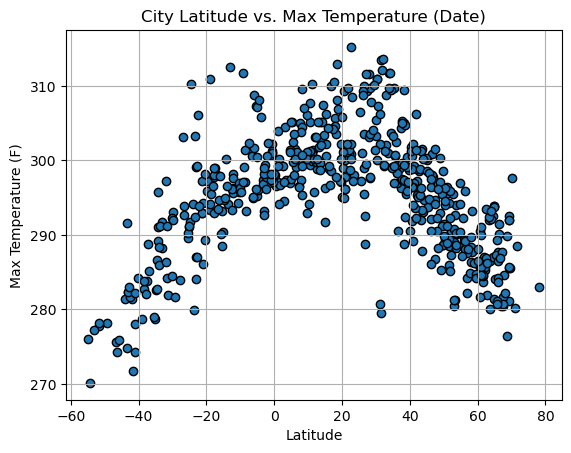

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

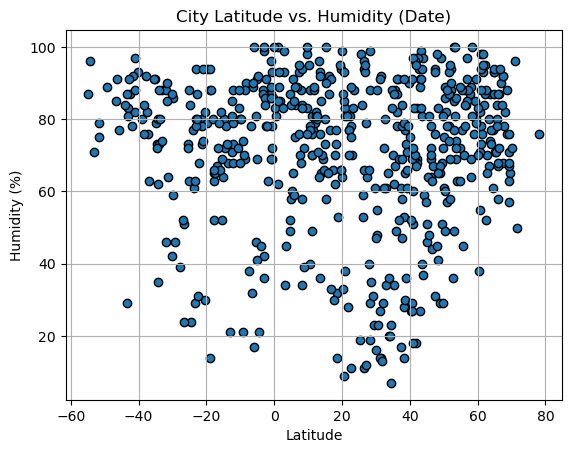

In [16]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

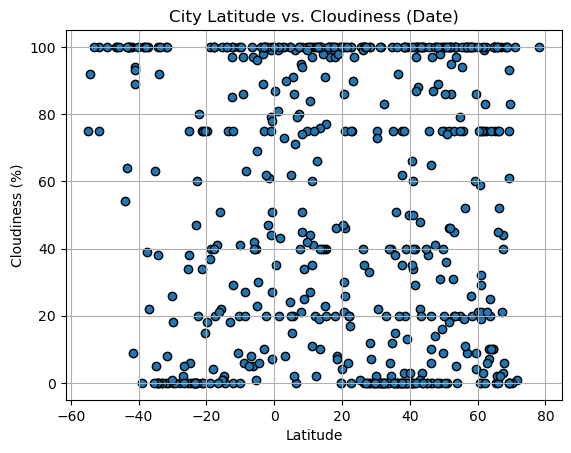

In [17]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

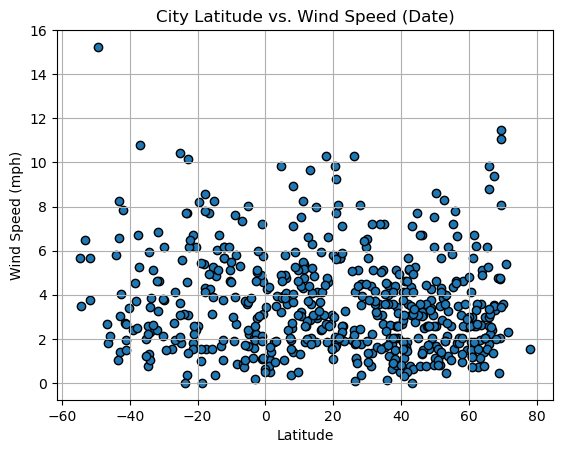

In [18]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid()

    # Print the r-squared value
    print(f"The r-squared is: {r_value**2}")
    print(f"P value is {pvalue}")

    # Show the plot
    plt.show()
    
    plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)", "Northern Hemisphere - Max Temp vs. Latitude", (10, 20))



In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

#Call line function
plot_linear_regression(x, y,"Linear Regression on the Southern Hemisphere for Maximum Temperature 'F' vs. Latitude", "Max Temp 'F'", (-50,30))


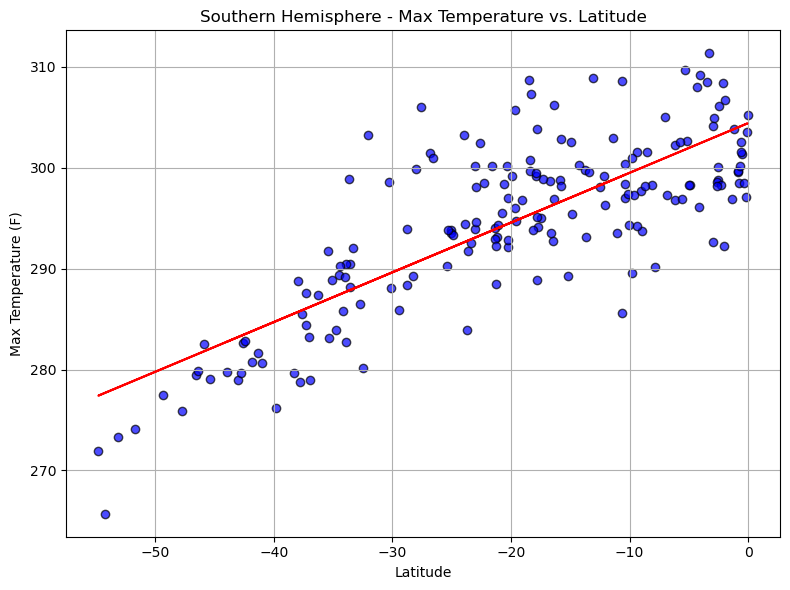

In [26]:
# Linear regression on Southern Hemisphere - Temperature vs. Latitude
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

plt.figure(figsize=(8, 6))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = slope * southern_hemi_df["Lat"] + intercept

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], c='blue', marker='o', alpha=0.7, edgecolors='black')

# Add linear regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate the linear regression equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")

# Set plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude")

# Display the plot
plt.grid()
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** In the scatter plot depicting the relationship between Max Temperature and Latitude in the Southern Hemisphere, we observe a discernible trend where temperatures tend to decrease as we move closer to the South Pole. The regression line, indicated in red, provides a general approximation of this trend. While the majority of data points align with this trend, there is also noticeable variability around the regression line. This variation suggests that while there is a tendency for temperatures to decrease with decreasing latitude, other factors may also contribute to temperature fluctuations. The data points are not all perfectly aligned along the regression line, indicating the presence of natural variability in the dataset.

### Humidity vs. Latitude Linear Regression Plot

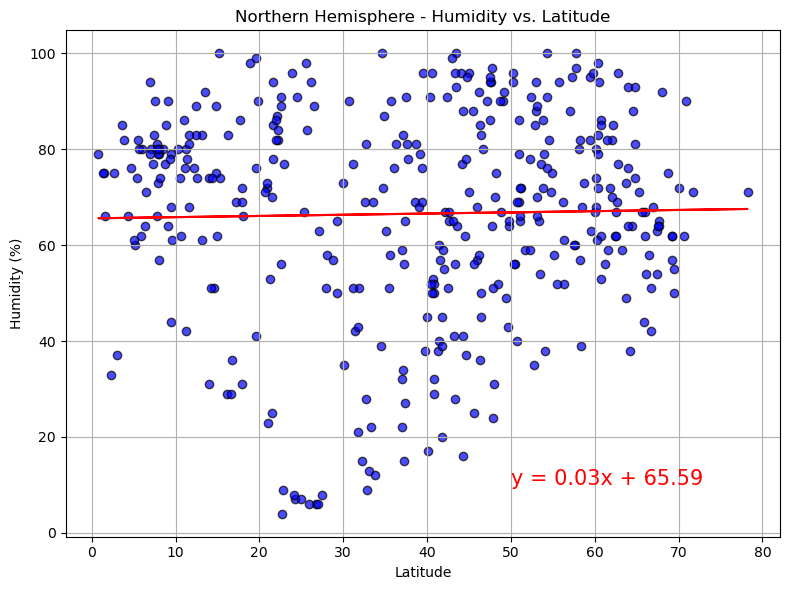

In [27]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere - Humidity vs. Latitude
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

plt.figure(figsize=(8, 6))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = slope * northern_hemi_df["Lat"] + intercept

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], c='blue', marker='o', alpha=0.7, edgecolors='black')

# Add linear regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate the linear regression equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (50, 10), fontsize=15, color="red")

# Set plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude")

# Display the plot
plt.grid()
plt.tight_layout()

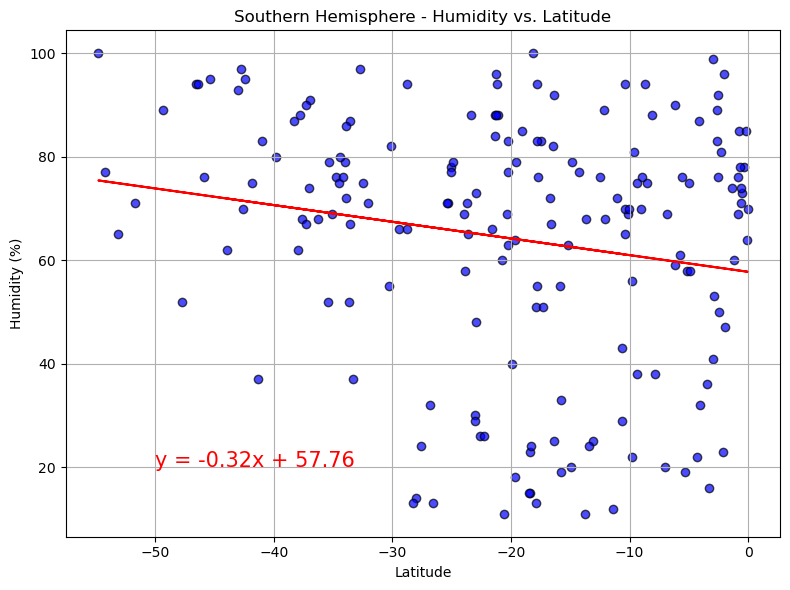

In [28]:
# Linear regression on Southern Hemisphere - Humidity vs. Latitude
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

plt.figure(figsize=(8, 6))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = slope * southern_hemi_df["Lat"] + intercept

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], c='blue', marker='o', alpha=0.7, edgecolors='black')

# Add linear regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate the linear regression equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")

# Set plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude")

# Display the plot
plt.grid()
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** As evidenced, the scatter plots depicting the relationships between variables such as Humidity and Latitude in both the Northern and Southern Hemispheres show no patterns of correlation. Across these plots, the data points are widely dispersed, and there are no clear trends indicating that changes in Latitude consistently lead to changes in the respective variables. This lack of correlation points toward the presence of other influential factors beyond Latitude. The drawn linear regression lines have low significance, meaning that these linear models fail to adequately explain the data's variability. Therefore, it is advisable to exercise caution when considering Latitude as a sole predictor for the respective variables in both hemispheres.

The absence of correlation shows the need for a more comprehensive exploration of other potential influencing factors, which could include geographical nuances, climatic variations, or regional distinctions. Drawing meaningful insights from these datasets necessitates a holistic approach, encompassing a broader array of variables and a more detailed analysis.

### Cloudiness vs. Latitude Linear Regression Plot

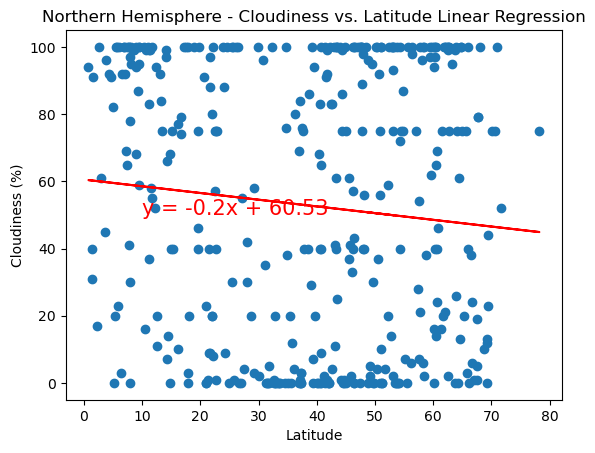

In [29]:
# Northern Hemisphere
# Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (10, 50), fontsize=15, color="red")

# Labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Cloudiness_vs_Latitude_Northern.png")

# Show plot
plt.show()


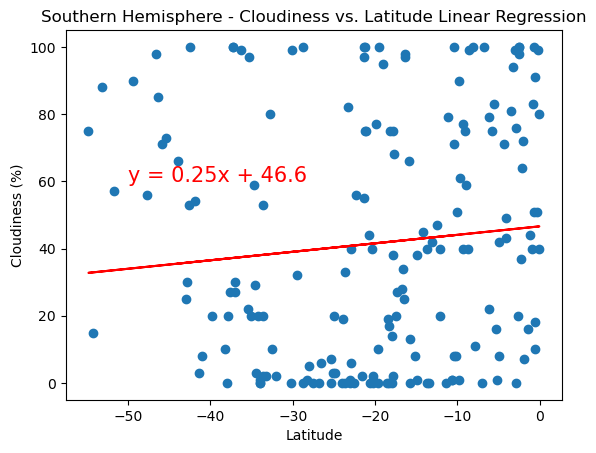

In [30]:
# Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (-50, 60), fontsize=15, color="red")

# Labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Cloudiness_vs_Latitude_Southern.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** The scatter plots show that the data points are scattered widely across the graph, indicating an absence of any significant correlation. In addition, the linear regression lines further highlight this lack of correlation, as they fail to capture any meaningful trend within the data. It's evident that Cloudiness, as measured here, does not exhibit any discernible pattern with respect to Latitude.

In conclusion, the wide distribution of data points around the regression lines reaffirms that Cloudiness is highly variable and subject to numerous external influences. This reinforces the importance of considering a more comprehensive set of factors when attempting to understand and predict Cloudiness trends

### Wind Speed vs. Latitude Linear Regression Plot

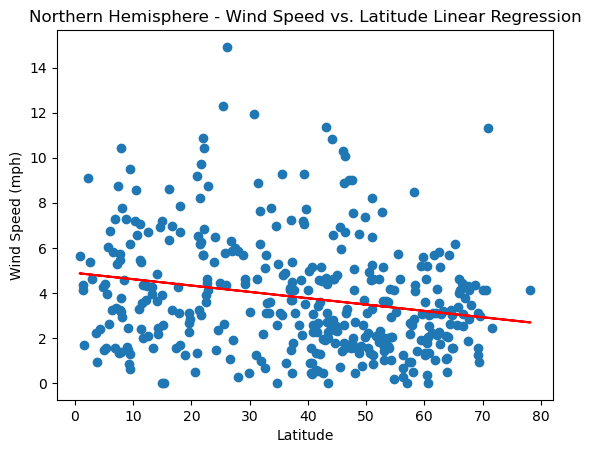

In [31]:
# Northern Hemisphere
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (40, 25), fontsize=15, color="red")

# Labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/WindSpeed_vs_Latitude_Northern.png")

# Show plot
plt.show()


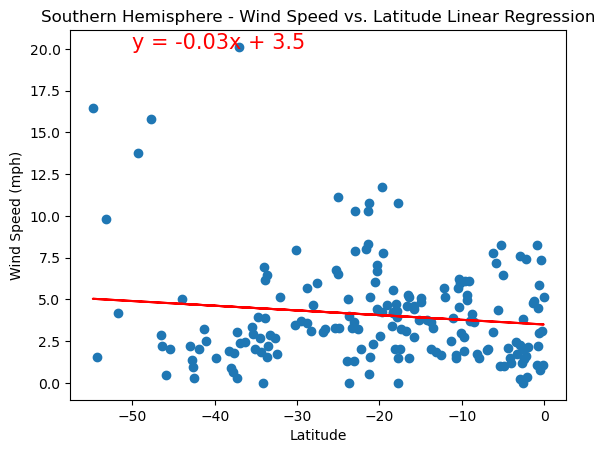

In [32]:
# Southern Hemisphere
# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")

# Labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/WindSpeed_vs_Latitude_Southern.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** In the scatter plots depicting Wind Speed vs. Latitude in both the Northern and Southern Hemispheres, we can observe a modest correlation between Latitude and Wind Speed, although the data points exhibit considerable scattering around the regression lines.

In the Northern Hemisphere plot, the linear regression line suggests a slight decrease in Wind Speed as we move away from the Equator towards higher latitudes. However, as already mentioned in other comments of the graphs abouve,this graph also indicates that there are other factors, such as local topography and atmospheric conditions, which play a substantial role in influencing Wind Speed. The correlation coefficient supports this interpretation by showing a relatively weak correlation. The line's equation serves as a general trend, but the scattering emphasizes that Wind Speed can fluctuate widely at similar latitudes due to these influencing variables.

Conversely, the Southern Hemisphere plot displays a comparable yet inverse trend. As we move away from the Equator towards lower latitudes, there is a slight increase in Wind Speed. The correlation coefficient again suggests a modest correlation, though the variability in Wind Speed at any given latitude remains prominent. This scattering of data points indicates that the Wind Speed is influenced by numerous factors specific to each location, masking the direct impact of Latitude alone.

In both hemispheres, while Latitude plays a role in shaping Wind Speed patterns, its significance is overshadowed by the intricate interplay of regional atmospheric dynamics, terrain characteristics, and local weather phenomena. This emphasizes that Wind Speed, unlike temperature or humidity, is more intricately linked with localized meteorological conditions, contributing to the widespread scattering observed in these plots."